Get a few points to extend the search of the boundary wings. Note that this is something that had already been done but we're going to do it here for the same grid size as the rest, for consistency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#load the points checked for one of the matrices with parameters within [10^-3, 10^3]
#corresponding alphashape:
ashape=np.load("./ashapes/ashape_N4univ_3_2022_8_23.npy")
datafolder='../../../../../data/magic-universalb' 
#datafolder='../clustersearch'
subfolder="2021_12_13_N4univ/tocheck_N4univ"
data=pd.read_csv(os.path.join(datafolder,subfolder,"mat_N4univ_3_checked.out"),sep=",|;",engine="python")
pos=data["pos"].values
stp=data["rho"].values
parsets=data[["ad","an","bd","bn","cd","cn","dd","dn","ed","en"]].values
print("parset min and max:", parsets.min(),parsets.max())

parset min and max: 0.001 1000.0


81 181
261 101


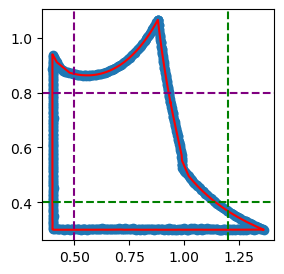

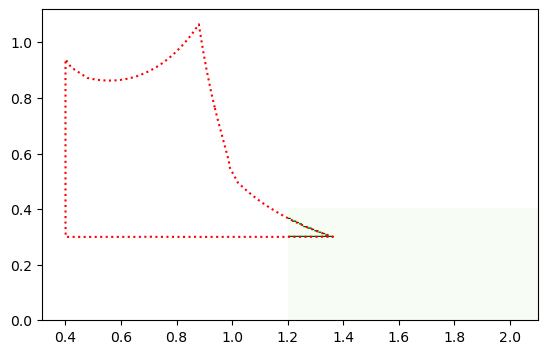

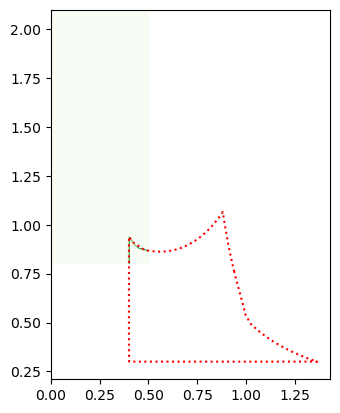

In [3]:
#in order to extend the wings, we are going to fill two matrices: 
#one from pos=[1.2, 2.1] stp=[0,0.4]
#another from pos=[0,0.5], stp=[0.8,2]
step=0.005
newposr=np.arange(1.2,2.1+step,step)
newstpr=np.arange(0,0.4+step,step)
nrow=len(newstpr)
ncol=len(newposr)
print(nrow,ncol)
points_r=np.zeros((nrow,ncol))
mat_pars_r=np.zeros((nrow,ncol,10))
for i in range(len(pos)):
    if pos[i]>newposr[0]:
        p=pos[i]
        s=stp[i]
        i_p=np.where(p>newposr)[0][-1]
        i_s=np.where(s>newstpr)[0][-1]
        points_r[i_s,i_p]=1
        mat_pars_r[i_s,i_p]=parsets[i].copy()
        
newposu=np.arange(0,0.5+step,step)
newstpu=np.arange(0.8,2.1+step,step)
nrow=len(newstpu)
ncol=len(newposu)
print(nrow,ncol)
points_u=np.zeros((nrow,ncol))
mat_pars_u=np.zeros((nrow,ncol,10))
for i in range(len(pos)):
    if pos[i]<newposu[-1] and stp[i]>newstpu[0]:
        p=pos[i]
        s=stp[i]
        i_p=np.where(p>newposu)[0][-1]
        i_s=np.where(s>newstpu)[0][-1]
        points_u[i_s,i_p]=1
        mat_pars_u[i_s,i_p]=parsets[i].copy()


fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.scatter(pos,stp)
ax.plot(ashape[0],ashape[1],color="r")
#visualize the new grid limits
#bottom right
ax.axvline(newposr[0],color="green",linestyle="--")
ax.axhline(newstpr[-1],color="green",linestyle="--")
#upper left
ax.axvline(newposu[-1],color="purple",linestyle="--")
ax.axhline(newstpu[0],color="purple",linestyle="--")



plt.show()

plt.imshow(points_r,origin="lower",extent=[newposr[0],newposr[-1],newstpr[0],newstpr[-1]],cmap=plt.cm.Greens)
plt.plot(ashape[0],ashape[1],color="r",linestyle=":")
plt.show()

plt.imshow(points_u,origin="lower",extent=[newposu[0],newposu[-1],newstpu[0],newstpu[-1]],cmap=plt.cm.Greens)
plt.plot(ashape[0],ashape[1],color="r",linestyle=":")
plt.show()

In [4]:
if True:
    np.save("mat_br_limit3.npy",points_r)
    np.save("mat_pars_br_limit3.npy",mat_pars_r)
    
    np.save("mat_ul_limit3.npy",points_u)
    np.save("mat_pars_ul_limit3.npy",mat_pars_u)

In [5]:
for i in range(len(mat_pars_u)):
    for j in range(len(mat_pars_u[0])):
        if np.sum(mat_pars_u[i,j])!=0:
            print(mat_pars_u[i,j])

[1.00000e-03 1.00000e-03 1.49641e-02 1.00000e-03 1.28216e-03 1.28216e-03
 9.75085e+02 4.24436e+02 1.09972e+02 1.21341e-03]
[1.00000e-03 1.00000e-03 1.42826e-02 1.00000e-03 1.00000e-03 1.00000e-03
 9.75085e+02 4.24436e+02 5.24955e+01 4.96280e-03]
[1.00000e-03 1.00000e-03 1.36381e-02 1.00000e-03 1.48122e-02 1.00000e-03
 9.62649e+02 4.22679e+02 3.86661e+02 8.64381e-02]
[1.00000e-03 1.00000e-03 1.32532e-02 1.00000e-03 1.70522e-03 1.00000e-03
 9.75085e+02 4.24436e+02 2.89164e+00 4.41032e-03]
[1.00000e-03 1.00000e-03 1.26303e-02 1.00000e-03 2.08255e-03 1.00000e-03
 9.62649e+02 4.22679e+02 3.86661e+02 1.00000e-03]
[1.00000e-03 1.00000e-03 1.17024e-02 1.00000e-03 3.94873e-02 1.00000e-03
 9.75085e+02 4.24436e+02 2.49350e+01 1.00000e-03]
[1.00000e-03 1.00000e-03 1.12811e-02 1.00000e-03 4.28125e-03 1.00000e-03
 9.75085e+02 4.24989e+02 1.52264e+02 3.87874e-03]
[1.07371e-03 1.07371e-03 1.16958e-02 1.00000e-03 1.00000e-03 1.00000e-03
 1.00000e+03 4.38576e+02 3.70304e+02 3.65267e-02]
[1.00000e-03 1.0